<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson1/DA_algorithms_hw_1_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1],
              [2, 3, 4]])
X

array([[1, 1, 1],
       [2, 3, 4]])

In [ ]:
y = [45, 55, 50]

In [ ]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

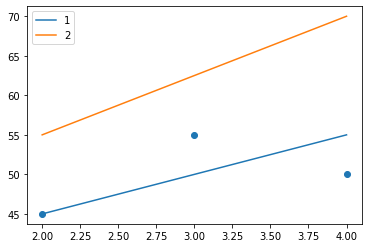

In [ ]:
y_pred1 = 35 * np.ones(3) + X[1]*5
y_pred2 = 40 * np.ones(3) + X[1]*7.5

plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

In [ ]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Задание 1.

Подберите скорость обучения (alpha) и количество итераций.

Насколько понял задание: требуется подобрать скорость обучения при которой получаем минимальное значение ошибки за минимальное количество итераций.

In [ ]:
def alpha_iter_search(X, alpha=1e-2, n_iter=100):
  """Алгоритм градиентного спуска, завершающий работу по превышению количества итераций
       Альфа неизменна"""
  print('X', X)
  print('X shape', X.shape)
  n = X.shape[1]
  W = np.array([1, .5])
  print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

  for i in range(n_iter):
        y_pred = np.dot(W, X)
        # print(W)
        # print(X)
        # print(y_pred)
        err = calc_mse(y, y_pred)
        for k in range(len(W)):
          print('W[k]', W[k])
          W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
          print('W[k_new]', W[k])
        if i % 50 == 0:
            # alpha /= 1.1
            print(f'Iteration #{i} W_new = {W}, MSE = {round(err, 2)}')

alpha_iter_search(X, alpha=0.05, n_iter=300)

print('Подобранный вариант скорости обучения = 0.05')

X [[1 1 1]
 [2 3 4]]
X shape (2, 3)
Number of objects = 3        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

W[k] 1.0
W[k_new] 5.75
W[k] 0.5
W[k_new] 14.883333333333333
Iteration #0 W_new = [ 5.75       14.88333333], MSE = 2271.42
W[k] 5.75
W[k_new] 5.71
W[k] 14.883333333333333
W[k_new] 13.937777777777779
W[k] 5.71
W[k_new] 5.957666666666666
W[k] 13.937777777777779
W[k_new] 13.91825925925926
W[k] 5.957666666666666
W[k_new] 6.186422222222221
W[k] 13.91825925925926
W[k_new] 13.843308641975309
W[k] 6.186422222222221
W[k_new] 6.414787407407407
W[k] 13.843308641975309
W[k_new] 13.772183621399178
W[k] 6.414787407407407
W[k_new] 6.6416535802469125
W[k] 13.772183621399178
W[k_new] 13.701303231824417
W[k] 6.6416535802469125
W[k_new] 6.867097252674896
W[k] 13.701303231824417
W[k_new] 13.630880700320073
W[k] 6.867097252674896
W[k_new] 7.091123317311385
W[k] 13.630880700320073
W[k_new] 13.560900180874867
W[k] 7.091123317311385
W[k_new] 7.313740931317786
W[k] 13.560900180874867
W[k_

Изначально просто подбирал параметры обычным перебором. И затем смотрел наиболее быстрый вариант, исходя из количества итераций.

alpha = 0.01


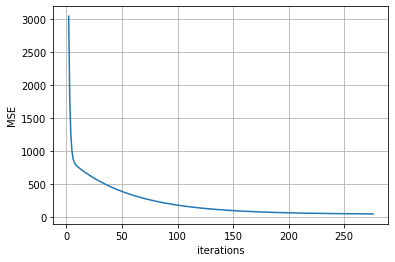

MSE = 49.37, количество итераций = 276
alpha = 0.02


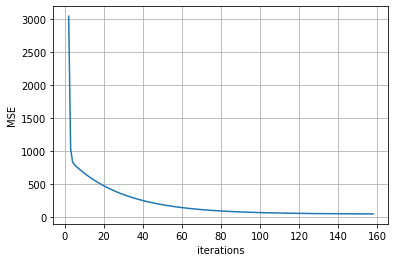

MSE = 46.54, количество итераций = 158
alpha = 0.03


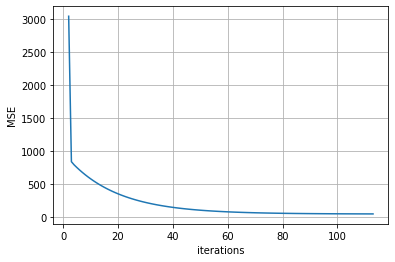

MSE = 45.64, количество итераций = 113
alpha = 0.04


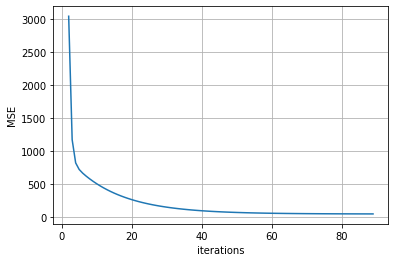

MSE = 45.17, количество итераций = 89
alpha = 0.05


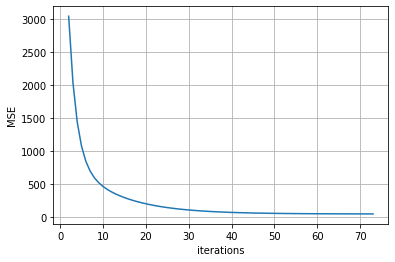

MSE = 44.97, количество итераций = 73
alpha = 0.06
MSE = inf, количество итераций = 3496
alpha = 0.07
MSE = inf, количество итераций = 932


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


In [ ]:
def tol_stop(alpha, n, X):

    err = np.inf
    err_last = 0
    iter = 0
    tol = abs(err - err_last)    
    eps = 0.1
    W = np.array([1, .5])
    errors = []
    counts = []


    while tol > eps:
        y_pred = np.dot(W, X)
        err_last = err
        errors.append(err)
        err = calc_mse(y, y_pred)
        for k in range(len(W)):
            W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
        
        if err == np.inf:
            break

        tol = abs(err - err_last)        
        iter += 1
        counts.append(iter)

    if(len(counts) != len(errors)):
      pass
    else:
      plt.plot(counts, errors)
      # plt.title('MSE')
      plt.xlabel('iterations')
      plt.ylabel('MSE')
      # plt.legend()
      plt.grid(True)
      plt.show()

    return f'MSE = {round(err, 2)}, количество итераций = {iter}'


def alpha_iter_search_bf(X):
  X_ = X.copy()
  n = X.shape[1]
  
  
  for i in range(1, 8, 1):
    alpha = i / 100
    print(f'alpha = {alpha}')

    print(tol_stop(alpha, n, X_))    
  

alpha_iter_search_bf(X)

# Задание 2.

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее.

## Исходный нерабочий код

In [ ]:
# исходный код

n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    
    if i % 10 == 0:
        
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


## Исправленный код.

In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(750):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1)) # обозначили ось, по которой суммируем
    W_pred = W
    
    if i % 100 == 0:        
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #700: W_new = [44.99413322  3.82489726], MSE = 43.97


# Задание 3.
Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

Собственно это уже делал в первом задании.

In [ ]:
def gradient_descent2(X, y, alpha=1e-3):
    """Алгоритм градиентного спуска, завершающий работу, когда ошибка перестаёт изменяться
       Альфа неизменна"""

    err = np.inf
    err_last = 0
    iter = 0
    tol = abs(err - err_last)
    W = np.array([1, 0.5])    
    eps = 0.00001
    n = X.shape[1]


    while tol > eps:
        y_pred = np.dot(W, X)
        err_last = err
        err = calc_mse(y, y_pred)
        for k in range(len(W)):
            W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
        
        if err == np.inf:
            break
        tol = abs(err - err_last)        
        iter += 1

    return f'Заданная точность = {eps}. При alpha = {alpha} количество итераций, которое потребовалось для нахождения минимума = {iter}: W_new = {W}, MSE = {err}'
        
        
print(gradient_descent2(X, y, alpha=0.0001))
print(gradient_descent2(X, y, alpha=0.001))
print(gradient_descent2(X, y, alpha=0.01))

Заданная точность = 1e-05. При alpha = 0.0001 количество итераций, которое потребовалось для нахождения минимума = 52795: W_new = [44.72139132  3.8743548 ], MSE = 44.02356215125962
Заданная точность = 1e-05. При alpha = 0.001 количество итераций, которое потребовалось для нахождения минимума = 6541: W_new = [44.95481392  3.83202721], MSE = 43.974221718293954
Заданная точность = 1e-05. При alpha = 0.01 количество итераций, которое потребовалось для нахождения минимума = 779: W_new = [45.02904272  3.81856696], MSE = 43.96928697128659


# Задание 4.

Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

В моём случае, на алгоритм GD скорость обучения оказывала сильное влияние на результаты. В зависимости от выбора этого параметра требовалось значительное изменение количества итераций для выхода на "полку".
Также точность измерения влияла на результаты, если увеличивать точность измерений, (т.е. уменьшать остановку рассчётов, в зависимости от разницы между ошибками), то некоторые варианты выдавали ошибку переполнения.